In [7]:
import geopandas as gpd

In [8]:
edges_order_of_appearance = open("edges_order_of_appearance_4_metrics.txt","r")
edges_values = open("edges_values_4_metrics.txt","r")

In [9]:
edges=edges_order_of_appearance.readlines()
edge_values = edges_values.readlines()

In [10]:
map = gpd.read_file("Indian_States.shp")
map_df=map.iloc[[35,1,2,3,5,23,8,9,10,11,12,13,14,15,17,18,19,20,21,22,34,25,26,27,28,29,30,31,32,33], :]

In [16]:
edges_order = []
i=0
while i != len(edges)-1:
    if edges[i] == '0\n':
        edges_order.append([edges[i].replace('\n','')])
        i+=1
    else: 
        edges_order.append([edges[i].replace('\n',''),edges[i+1].replace('\n','')])
        i+=2


4136


In [28]:
e_values = []
for i in edge_values:
    e_values.append(i.replace('\n',''))

# We have stored the edges in their order of appearance according to the epsilon values in edges_order and the corresponding epsilon values in e_values. These two lists are of the same length and correspond to each other entry-wise.

In [29]:
similarity_score = {}
for i in range(1,31):
    similarity_score[i] = {}
for i in range(len(edges_order)):
    if edges_order[i]!=['0']:
        similarity_score[int(edges_order[i][0])][int(edges_order[i][1])] = float(e_values[i])
        similarity_score[int(edges_order[i][1])][int(edges_order[i][0])] = float(e_values[i])


In [30]:
state_number_to_name = {'Andhra Pradesh':1, 'Arunachal Pradesh':2, 'Assam':3, 'Bihar':4, 'Chhattisgarh':5, 'Delhi':6, 'Goa':7, 
                        'Gujarat':8, 'Haryana':9, 'Himachal Pradesh': 10, 'Jammu & Kashmir':11, 'Jharkhand':12, 'Karnataka':13,
                       'Kerala':14, 'Madhya Pradesh':15, 'Maharashtra':16, 'Manipur':17, 'Meghalaya':18, 'Mizoram':19,
                        'Nagaland':20, 'Odisha':21, 'Punjab':22, 'Rajasthan':23, 'Sikkim':24, 'Tamil Nadu':25, 'Telangana':26,
                        'Tripura':27, 'Uttar Pradesh':28, 'Uttarakhand':29, 'West Bengal':30}

In [31]:
def Similar_States(a,b):
    
    temp=[]
    temp3=state_number_to_name[a]
    temp1=list(similarity_score[temp3].values())
    temp2=[]
    for i in range(len(temp1)):
        if temp1[i]<b:temp.append(i)
    
    for i in temp:
        temp2.append(list(similarity_score[temp3].keys())[i]-1)
    
    temp3= map_df.iloc[temp2,:]
    base = map_df.plot(color='white', edgecolor='black')
    temp3.plot(ax=base)
    

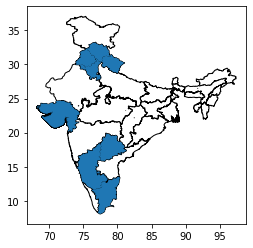

In [34]:
Similar_States('Maharashtra', 0.2)